Draw a single line plot with error bands showing a confidence interval:

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set()

In [54]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

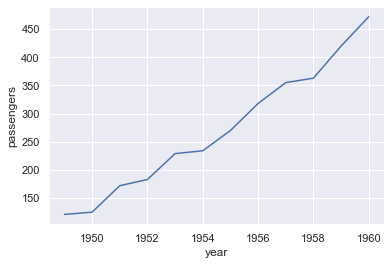

In [60]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

In [56]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<AxesSubplot:xlabel='year', ylabel='May'>

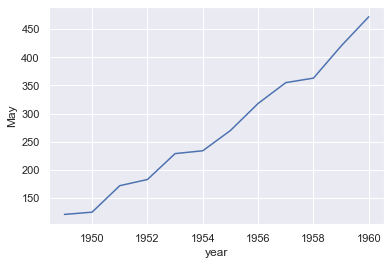

In [62]:
sns.lineplot(data=flights_wide["May"])

<AxesSubplot:xlabel='year', ylabel='passengers'>

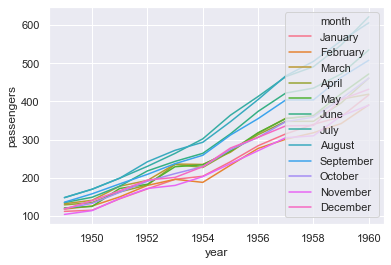

In [63]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

<AxesSubplot:xlabel='year', ylabel='passengers'>

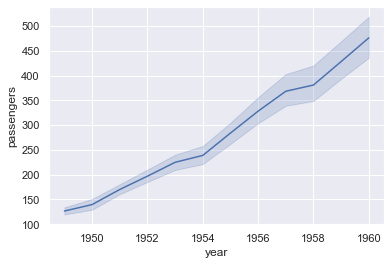

In [67]:
sns.lineplot(data=flights, x="year", y="passengers")

In [69]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

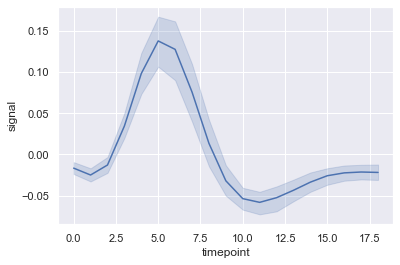

In [70]:
sns.lineplot(x="timepoint", y="signal", data=fmri)

Group by another variable and show the groups with different colors:

In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")

Show the grouping variable with both color and line dashing:

In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", style="event")

Use color and line dashing to represent two different grouping variables:

In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="event")

Use markers instead of the dashes to identify groups:

In [ ]:
sns.lineplot(
    data=fmri, x="timepoint", y="signal", hue="event", style="event",
    markers=True, dashes=False
)

Show error bars instead of error bands and plot the standard error:

In [ ]:
sns.lineplot(
    data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", ci=68
)

Show experimental replicates instead of aggregating:

In [ ]:
sns.lineplot(
    data=fmri.query("region == 'frontal'"),
    x="timepoint", y="signal", hue="event", units="subject",
    estimator=None, lw=1,
)

Use a quantitative color mapping:

In [ ]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.lineplot(
    data=dots, x="time", y="firing_rate", hue="coherence", style="choice",
)

Use a different normalization for the colormap:

In [ ]:
sns.lineplot(
    data=dots.query("coherence > 0"),
    x="time", y="firing_rate", hue="coherence", style="choice",
    hue_norm=mpl.colors.LogNorm(),
)

Use a different color palette:

In [ ]:
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    hue="coherence", style="choice",
    palette="ch:2.5,.25"
)

Use specific color values, treating the hue variable as categorical:

In [ ]:
palette = sns.color_palette("mako_r", 6)
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    hue="coherence", style="choice",
    palette=palette
)

Change the width of the lines with a quantitative variable:

In [ ]:
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    size="coherence", hue="choice",
    legend="full"
)

Change the range of line widths used to normalize the size variable:

In [ ]:
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    size="coherence", hue="choice",
    sizes=(.25, 2.5)
)

Plot from a wide-form DataFrame:

In [ ]:
index = pd.date_range("1 1 2000", periods=100, freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
sns.lineplot(data=wide_df)

Plot from a list of Series:

In [ ]:
list_data = [wide_df.loc[:"2005", "a"], wide_df.loc["2003":, "b"]]
sns.lineplot(data=list_data)

In [ ]:
sns.lineplot(data=wide_df["a"], color="r", label="line")

Draw lines at points as they appear in the dataset:

In [ ]:
x, y = np.random.normal(size=(2, 5000)).cumsum(axis=1)
sns.lineplot(x=x, y=y, sort=False, lw=1)

In [ ]:
sns.relplot(
    data=fmri, x="timepoint", y="signal",
    col="region", hue="event", style="event",
    kind="line"
)